In [12]:
# Import modelflow

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#### %matplotlib inline

In [14]:
import matplotlib.pyplot as plt

In [15]:
from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

In [16]:
model.scroll_off()

In [17]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [18]:
# Load model and data, and run 

if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia.pcim',run=1,silent=1)
from inject import inject
inject(masia)    

Load model


In [19]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') and  var.split('_')[0] in masia.countries_ASEAN ]

In [20]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))

In [21]:
emmision_target = 36_440

In [22]:
inject(masia)
masia.lastdf = masia.basedf.copy()
instruments = [[f'{country}_GCARBR_A' for country in masia.countries_GCARBR_A]]

target = pd.DataFrame([emmision_target],index=[2050],columns=['WLD_CO2'])

t_i = targets_instruments(databank=baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=300.,defaultconv=1000,varimpulse=True,nonlin=False)

In [23]:
t_i.debug=1
res = t_i(delay=29)

Distance    :WLD_CO2   -26624.039974
Name: 2050, dtype: float64
OrgDistance :WLD_CO2   -26624.039974
Name: 2050, dtype: float64
Instrument_0    1.279162
dtype: float64
Distance    :WLD_CO2   -3247.955049
Name: 2050, dtype: float64
OrgDistance :WLD_CO2   -3247.955049
Name: 2050, dtype: float64
Instrument_0    0.156049
dtype: float64
Distance    :WLD_CO2   -2050.955219
Name: 2050, dtype: float64
OrgDistance :WLD_CO2   -2050.955219
Name: 2050, dtype: float64
Instrument_0    0.098539
dtype: float64
Distance    :WLD_CO2   -1363.020001
Name: 2050, dtype: float64
OrgDistance :WLD_CO2   -1363.020001
Name: 2050, dtype: float64
Instrument_0    0.065487
dtype: float64
Distance    :WLD_CO2   -931.197277
Name: 2050, dtype: float64
OrgDistance :WLD_CO2   -931.197277
Name: 2050, dtype: float64


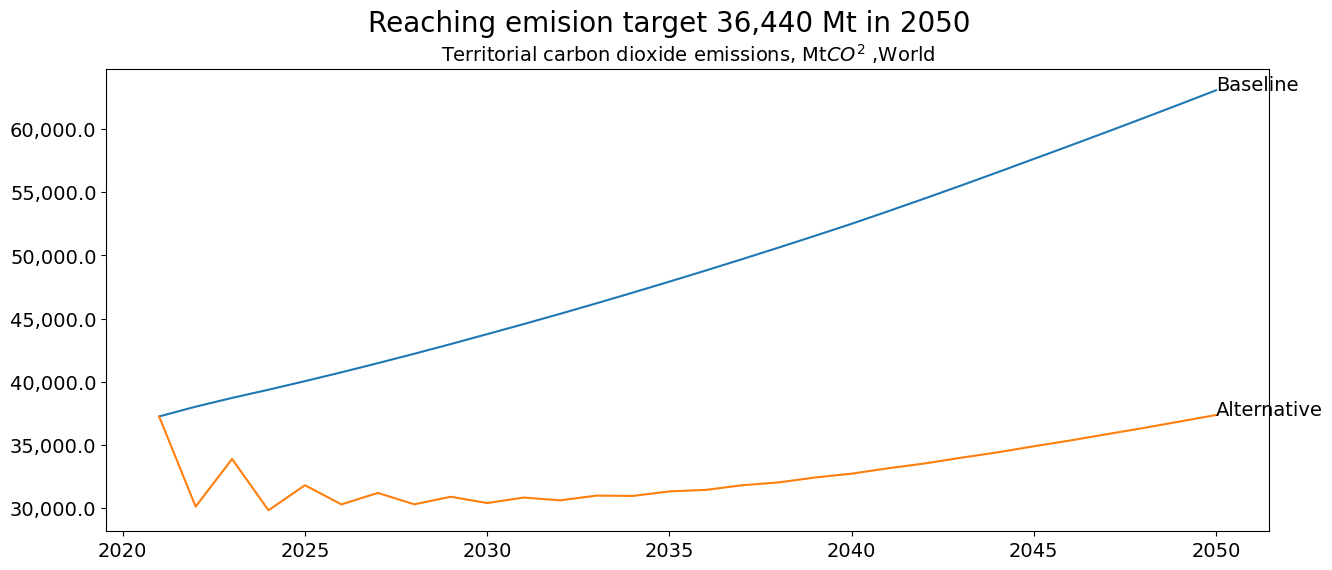

In [24]:
masia['wld_co2'].rename().plot_alt(title=f'Reaching emision target {emmision_target:,.0f} Mt in 2050')

# Tax in each country 

In [1]:
masia.exodif().rename(columns=masia.var_description).T

NameError: name 'masia' is not defined

# World reduction 

# ASEAN reduction

In [26]:

    Threshold =199
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);


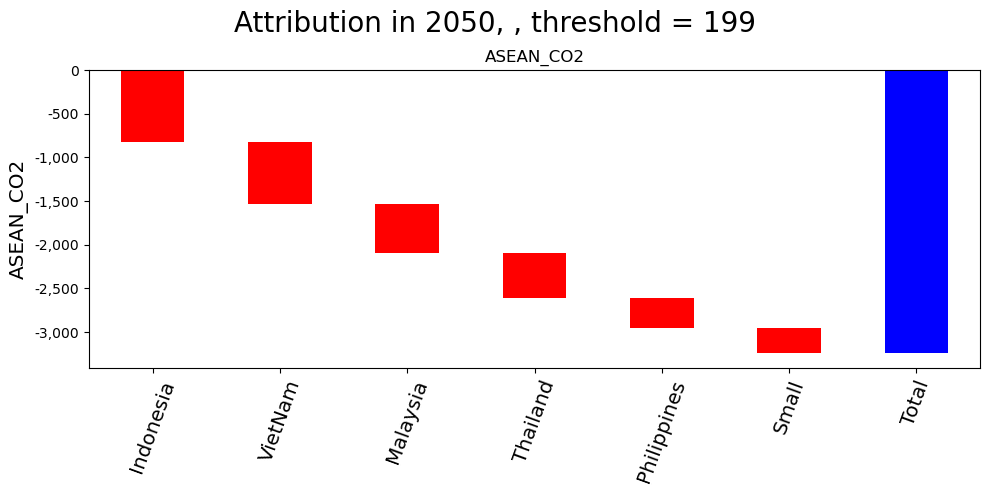

In [27]:
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get)
